# 4 章


In [2]:
import numpy as np

In [3]:
def sum_suqared_error(y, t):
  return 0.5 * np.sum((y - t)**2)

In [28]:
print(0.4**2)

0.16000000000000003


In [29]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_suqared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_suqared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


# 4.2.2


In [5]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 4.2.3

In [8]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
print(train_size)
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

60000
[21133  1835 53148  1032 46931  7806 21390 53179 21664  8764]


In [39]:
x_batch.shape

(10, 784)

### 4.2.4

In [40]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  print(y[np.arange(batch_size), t])
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

p.95 理解

## 4.3

### 4.3.1

In [43]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2

In [44]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

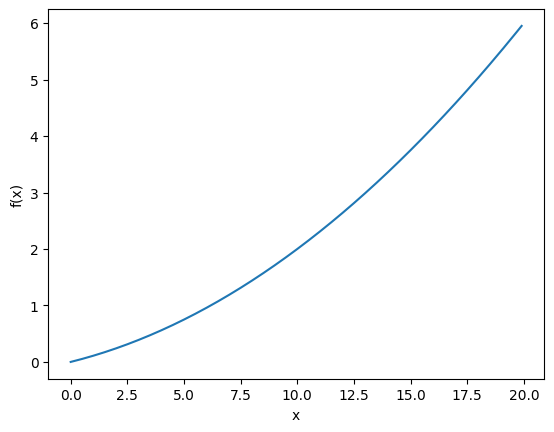

In [45]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [46]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### 4.3.3

In [48]:
def function_2(x):
  return x[0]**2 + x[1]**2 # np.sum(x**2)

In [47]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [17]:
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4

In [81]:
def numerical_gradient(f, x):
  """
  f: function
  x: np.array
  """
  # print(f"x: {x}")
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]
    x[idx] = tmp_val + h
    fxh1 = f(x)
    # print(f"x: {x}")
    # print(f"f(x+h): {f(x)}")

    x[idx] = tmp_val - h
    fxh2 = f(x)
    # print(f"x: {x}")
    # print(f"f(x-h): {f(x)}")

    grad[idx] = (fxh1 - fxh2) / (2*h)
    # print(f"grad: {grad}\n")
    x[idx] = tmp_val

  return grad

In [82]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

### 4.4.1

In [92]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    print(f"{i}回目のx: {x}", end=" ")
    grad = numerical_gradient(f, x)
    print(f"grad: {grad}",end=" ")
    x -= lr * grad
    print(f"x: {x}")

  return x

In [93]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

0回目のx: [-3.  4.] grad: [-6.  8.] x: [-2.4  3.2]
1回目のx: [-2.4  3.2] grad: [-4.8  6.4] x: [-1.92  2.56]
2回目のx: [-1.92  2.56] grad: [-3.84  5.12] x: [-1.536  2.048]
3回目のx: [-1.536  2.048] grad: [-3.072  4.096] x: [-1.2288  1.6384]
4回目のx: [-1.2288  1.6384] grad: [-2.4576  3.2768] x: [-0.98304  1.31072]
5回目のx: [-0.98304  1.31072] grad: [-1.96608  2.62144] x: [-0.786432  1.048576]
6回目のx: [-0.786432  1.048576] grad: [-1.572864  2.097152] x: [-0.6291456  0.8388608]
7回目のx: [-0.6291456  0.8388608] grad: [-1.2582912  1.6777216] x: [-0.50331648  0.67108864]
8回目のx: [-0.50331648  0.67108864] grad: [-1.00663296  1.34217728] x: [-0.40265318  0.53687091]
9回目のx: [-0.40265318  0.53687091] grad: [-0.80530637  1.07374182] x: [-0.32212255  0.42949673]
10回目のx: [-0.32212255  0.42949673] grad: [-0.64424509  0.85899346] x: [-0.25769804  0.34359738]
11回目のx: [-0.25769804  0.34359738] grad: [-0.51539608  0.68719477] x: [-0.20615843  0.27487791]
12回目のx: [-0.20615843  0.27487791] grad: [-0.41231686  0.54975581] x: [

array([-6.11110793e-10,  8.14814391e-10])

In [94]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

0回目のx: [-3.  4.] grad: [-6.  8.] x: [ 57. -76.]
1回目のx: [ 57. -76.] grad: [ 114.         -152.00000001] x: [-1083.00000003  1444.00000007]
2回目のx: [-1083.00000003  1444.00000007] grad: [-2165.99999927  2888.00000213] x: [ 20576.99999267 -27436.00002124]
3回目のx: [ 20576.99999267 -27436.00002124] grad: [ 41154.00075912 -54872.00021744] x: [-390963.00759858  521284.00215314]
4回目のx: [-390963.00759858  521284.00215314] grad: [-781925.96435547 1042568.05419922] x: [ 7428296.63595611 -9904396.53983905]
5回目のx: [ 7428296.63595611 -9904396.53983905] grad: [ 14856562.5 -19808750. ] x: [-1.41137328e+08  1.88183103e+08]
6回目のx: [-1.41137328e+08  1.88183103e+08] grad: [-2.8224e+08  3.7632e+08] x: [ 2.68126267e+09 -3.57501690e+09]
7回目のx: [ 2.68126267e+09 -3.57501690e+09] grad: [ 5.36576e+09 -7.14752e+09] x: [-5.09763373e+10  6.79001831e+10]
8回目のx: [-5.09763373e+10  6.79001831e+10] grad: [-9.9614720e+10  1.3631488e+11] x: [ 9.45170863e+11 -1.29524862e+12]
9回目のx: [ 9.45170863e+11 -1.29524862e+12] grad: [2.

array([-2.58983747e+13, -1.29524862e+12])

In [98]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.00001, step_num=100)

0回目のx: [-3.  4.] grad: [-6.  8.] x: [-2.99994  3.99992]
1回目のx: [-2.99994  3.99992] grad: [-5.99988  7.99984] x: [-2.99988  3.99984]
2回目のx: [-2.99988  3.99984] grad: [-5.99976  7.99968] x: [-2.99982  3.99976]
3回目のx: [-2.99982  3.99976] grad: [-5.99964001  7.99952001] x: [-2.99976001  3.99968001]
4回目のx: [-2.99976001  3.99968001] grad: [-5.99952001  7.99936002] x: [-2.99970001  3.99960002]
5回目のx: [-2.99970001  3.99960002] grad: [-5.99940002  7.99920003] x: [-2.99964002  3.99952002]
6回目のx: [-2.99964002  3.99952002] grad: [-5.99928004  7.99904005] x: [-2.99958003  3.99944003]
7回目のx: [-2.99958003  3.99944003] grad: [-5.99916005  7.99888007] x: [-2.99952003  3.99936004]
8回目のx: [-2.99952003  3.99936004] grad: [-5.99904007  7.99872009] x: [-2.99946004  3.99928006]
9回目のx: [-2.99946004  3.99928006] grad: [-5.99892009  7.99856012] x: [-2.99940005  3.99920007]
10回目のx: [-2.99940005  3.99920007] grad: [-5.99880011  7.99840014] x: [-2.99934007  3.99912009]
11回目のx: [-2.99934007  3.99912009] grad: [-5.9

array([-2.99400594,  3.99200791])

### 4.4.2 ニューラルネットワークに対する勾配

In [107]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3)

  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss

In [122]:
net = simpleNet()
print(f"net.W: {net.W}\n")

x = np.array([0.6, 0.9])
p = net.predict(x)
print(f"p: {p}")
print(f"np.argmax(p): {np.argmax(p)}\n")

t = np.array([0, 0, 1])
print(f"net.loss(x, t): {net.loss(x, t)}\n")

def f(W):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

net.W: [[ 1.29986591  1.76809731 -0.59453359]
 [-0.05992263  0.54509933 -0.98411853]]

p: [ 0.72598919  1.55144779 -1.24242683]
np.argmax(p): 1

net.loss(x, t): 3.1988156411479745

[[ 0.17530462  0.40020773 -0.57551234]
 [ 0.26295693  0.60031159 -0.86326852]]
[[ 0.17530462  0.40020773 -0.57551234]
 [ 0.26295693  0.60031159 -0.86326852]]


# 4.5 学習アルゴリズムの実装

In [130]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

In [131]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape # (784, 100)
net.params['b1'].shape # (100,)
net.params['W2'].shape # (100, 10)
net.params['b2'].shape # (10,)

(10,)

In [134]:
x = np.random.rand(100, 784) # ダミーの入力データ(100枚分)
y = net.predict(x)

In [135]:
x = np.random.rand(100, 784) # ダミーの入力データ(100枚分)
t = np.random.rand(100, 10) # ダミーの正解ラベル(100枚分)

In [136]:
grads = net.numerical_gradient(x, t)

In [137]:
grads

{'W1': array([[-1.60367009e-04, -1.23726571e-04, -1.51260453e-04, ...,
         -9.26680377e-05, -1.31603306e-05, -1.50050665e-04],
        [ 1.86050531e-05,  8.31526847e-06, -5.53569124e-05, ...,
         -7.56299312e-05,  9.28013755e-05, -1.37140359e-04],
        [-1.03556437e-04, -1.02243587e-04, -8.57930527e-05, ...,
         -7.30462690e-05,  6.96719504e-05, -1.87149092e-04],
        ...,
        [ 5.85886073e-05, -5.56589796e-05, -1.11627254e-04, ...,
         -1.51384061e-04,  1.53166062e-04, -2.02206658e-04],
        [-1.39226326e-04, -7.63376407e-05, -1.35646521e-04, ...,
         -2.84893331e-05,  1.08205631e-04, -2.17443561e-04],
        [-4.93124785e-05,  8.21098367e-05, -1.15755503e-04, ...,
         -2.82597123e-05,  1.24900139e-04, -1.70974834e-04]]),
 'b1': array([-8.21971402e-05, -4.26147939e-05, -1.10077714e-04, -4.28696358e-04,
        -5.69371417e-05, -3.45828739e-04,  5.11665132e-05, -3.83347765e-04,
        -1.93772414e-04, -8.27074120e-05,  3.29472856e-04, -1.783

# 4.5.2 ミニバッチ学習の実装

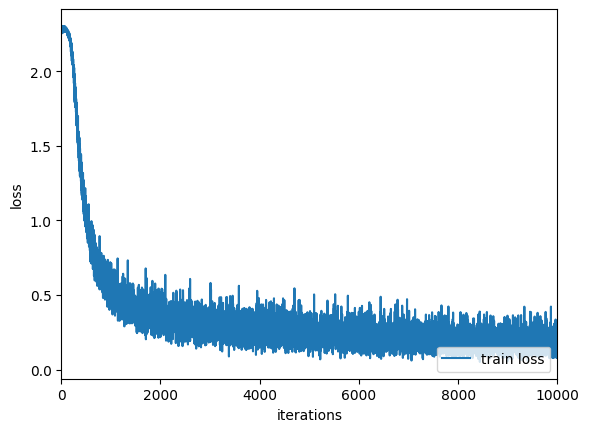

In [143]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  # ミニバッチの取得
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 勾配の計算
  # grad = network.numerical_gradient(x_batch, t_batch)
  grad = network.gradient(x_batch, t_batch)

  # パラメータの更新
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 学習経過の記録
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

# グラフの描画
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.xlim(0, 10000)
plt.legend(loc='lower right')
plt.show()

エポック

train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.7923166666666667, 0.7933
train acc, test acc | 0.8800833333333333, 0.8846
train acc, test acc | 0.9002333333333333, 0.904
train acc, test acc | 0.9079, 0.9099
train acc, test acc | 0.9142166666666667, 0.9166
train acc, test acc | 0.9196666666666666, 0.9209
train acc, test acc | 0.9231333333333334, 0.9241
train acc, test acc | 0.9266166666666666, 0.9284
train acc, test acc | 0.9302166666666667, 0.9325
train acc, test acc | 0.934, 0.9358
train acc, test acc | 0.9365, 0.9374
train acc, test acc | 0.9396666666666667, 0.9391
train acc, test acc | 0.9418333333333333, 0.9418
train acc, test acc | 0.9441166666666667, 0.9436
train acc, test acc | 0.94595, 0.9442
train acc, test acc | 0.9471666666666667, 0.9463


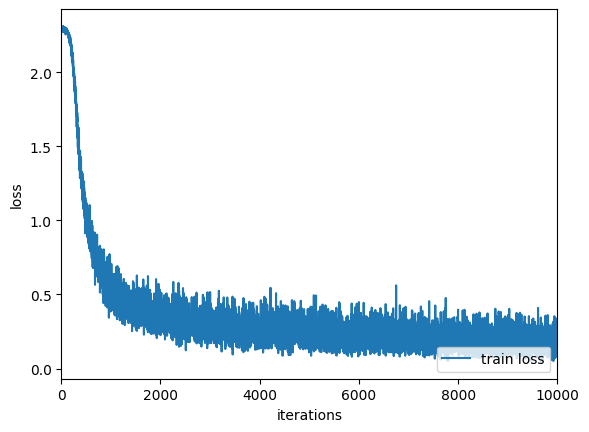

In [144]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = x_train.shape[0]

# ハイパーパラメータ
iters_num = 10000
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  # ミニバッチの取得
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 勾配の計算
  # grad = network.numerical_gradient(x_batch, t_batch)
  grad = network.gradient(x_batch, t_batch)

  # パラメータの更新
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 学習経過の記録
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  # 1エポックごとに認識精度を計算
  if i%iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(f"train acc, test acc | {train_acc}, {test_acc}")

# グラフの描画
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.xlim(0, 10000)
plt.legend(loc='lower right')
plt.show()